# Analysis of US Census Data

## Is Unemployment Correlated to Educational Attainment?

Showcase Analysis of US Census Data Using Python

In [1]:
import pandas as pd
import censusdata
import re

To download data, we need to identify the relevant tables containing the variables of interest to us. One way to do this would be to refer to the ACS documentation, in particular the Table Shells (https://www.census.gov/programs-surveys/acs/technical-documentation/summary-file-documentation.html). Alternatively, it is possible to do this from within Python. censusdata.search will search for given text patterns. The downside to this is output can be voluminous, as in the following searches, as ACS frequently provides a large number of different tabulations related to a given topic area.

In [2]:
SURVEY = 'acs5'
YEAR = 2019

In [3]:
# Crude Search : Get Employment Variables
censusdata.search(SURVEY, YEAR, 'label', 'unemploy')[:5]

[('B12006_006E',
  'MARITAL STATUS BY SEX BY LABOR FORCE PARTICIPATION',
  'Estimate!!Total:!!Never married:!!Male:!!In labor force:!!Unemployed'),
 ('B12006_011E',
  'MARITAL STATUS BY SEX BY LABOR FORCE PARTICIPATION',
  'Estimate!!Total:!!Never married:!!Female:!!In labor force:!!Unemployed'),
 ('B12006_017E',
  'MARITAL STATUS BY SEX BY LABOR FORCE PARTICIPATION',
  'Estimate!!Total:!!Now married (except separated):!!Male:!!In labor force:!!Unemployed'),
 ('B12006_022E',
  'MARITAL STATUS BY SEX BY LABOR FORCE PARTICIPATION',
  'Estimate!!Total:!!Now married (except separated):!!Female:!!In labor force:!!Unemployed'),
 ('B12006_028E',
  'MARITAL STATUS BY SEX BY LABOR FORCE PARTICIPATION',
  'Estimate!!Total:!!Separated:!!Male:!!In labor force:!!Unemployed')]

In [4]:
# Refined Search : Get Employment Variables
censusdata.search(
    SURVEY, YEAR, 
    'concept',
    lambda value: re.match('EMPLOYMENT STATUS FOR THE POPULATION', value)
)

[('B23025_001E',
  'EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER',
  'Estimate!!Total:'),
 ('B23025_002E',
  'EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER',
  'Estimate!!Total:!!In labor force:'),
 ('B23025_003E',
  'EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER',
  'Estimate!!Total:!!In labor force:!!Civilian labor force:'),
 ('B23025_004E',
  'EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER',
  'Estimate!!Total:!!In labor force:!!Civilian labor force:!!Employed'),
 ('B23025_005E',
  'EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER',
  'Estimate!!Total:!!In labor force:!!Civilian labor force:!!Unemployed'),
 ('B23025_006E',
  'EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER',
  'Estimate!!Total:!!In labor force:!!Armed Forces'),
 ('B23025_007E',
  'EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER',
  'Estimate!!Total:!!Not in labor force')]

In [5]:
var_dict = censusdata.censustable(SURVEY, YEAR, 'B23025')
censusdata.printtable(var_dict)

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B23025_001E  | EMPLOYMENT STATUS FOR THE POPU | !! Estimate Total:                                       | int  
B23025_002E  | EMPLOYMENT STATUS FOR THE POPU | !! !! Estimate Total: In labor force:                    | int  
B23025_003E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! Estimate Total: In labor force: Civilian labor  | int  
B23025_004E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! !! Estimate Total: In labor force: Civilian lab | int  
B23025_005E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! !! Estimate Total: In labor force: Civilian lab | int  
B23025_006E  | EMPLOYMENT STATUS FOR THE POPU | !! !! !! Estimate Total: In labor force: Armed Forces    | int  
B23025_007E  | EMPLOYMENT STATUS FOR THE POPU | !! !! Estimate Total: Not in labor force     

In [6]:
employ = censusdata.download(
    SURVEY, # Survey
    YEAR,   # Year
    censusdata.censusgeo([('state', '*')]), # Geography,
    list(var_dict.keys()) # Variables
)
employ.index = [s.name for s in employ.index]
employ.index.name = "Summary level: 040"

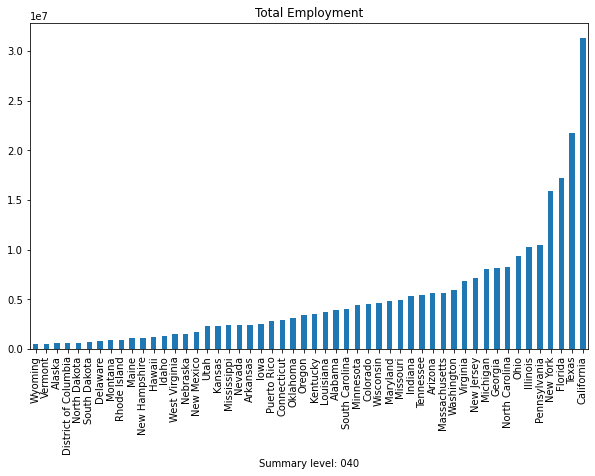

In [7]:
employ['B23025_001E'].sort_values().plot.bar(rot='90',figsize=(10,6), title='Total Employment');

In [8]:
pct_unemployed = lambda row: row.B23025_005E / row.B23025_003E

unemployment = employ.apply(pct_unemployed, axis=1)

In [9]:
unemployment.sort_values()

Summary level: 040
North Dakota            0.027569
Nebraska                0.033408
South Dakota            0.034236
Utah                    0.035765
Wisconsin               0.036059
Vermont                 0.036101
Minnesota               0.036197
New Hampshire           0.036229
Iowa                    0.037324
Montana                 0.040298
Kansas                  0.040629
Maine                   0.041356
Hawaii                  0.042601
Colorado                0.043272
Idaho                   0.043326
Wyoming                 0.044841
Missouri                0.045746
Virginia                0.046100
Indiana                 0.047966
Massachusetts           0.048306
Washington              0.049537
Maryland                0.050766
Texas                   0.050767
Oklahoma                0.050796
Arkansas                0.051297
Tennessee               0.052640
Pennsylvania            0.053060
Ohio                    0.053213
Rhode Island            0.053966
New York                

In [10]:
# Refined Search : Get Educational Attainment
censusdata.search(
    SURVEY, YEAR, 
    'concept',
    lambda value: re.match('EDUCATIONAL ATTAINMENT', value)
)[:30]

[('B15003_001E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:'),
 ('B15003_002E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:!!No schooling completed'),
 ('B15003_003E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:!!Nursery school'),
 ('B15003_004E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:!!Kindergarten'),
 ('B15003_005E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:!!1st grade'),
 ('B15003_006E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:!!2nd grade'),
 ('B15003_007E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:!!3rd grade'),
 ('B15003_008E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER',
  'Estimate!!Total:!!4th grade'),
 ('B15003_009E',
  'EDUCATIONAL ATTAINMENT FOR THE POPULATION 

In [11]:
var_dict = censusdata.censustable(SURVEY, YEAR, 'B15003')
censusdata.printtable(var_dict)

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15003_001E  | EDUCATIONAL ATTAINMENT FOR THE | !! Estimate Total:                                       | int  
B15003_002E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total: No schooling completed             | int  
B15003_003E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total: Nursery school                     | int  
B15003_004E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total: Kindergarten                       | int  
B15003_005E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total: 1st grade                          | int  
B15003_006E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total: 2nd grade                          | int  
B15003_007E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total: 3rd grade              

In [12]:
edu = censusdata.download(
    SURVEY, # Survey
    YEAR,   # Year
    censusdata.censusgeo([('state', '*')]), # Geography,
    list(var_dict.keys()) # Variables
)
edu.index = [s.name for s in edu.index]
edu.index.name = "Summary level: 040"

In [13]:
al_total = edu.iloc[0,0]
al = edu.iloc[0,1:]
al_pct = al / al_total
readable = [d['label'][18:] for d in list(var_dict.values())[1:]]
al_pct.index = readable
al_pct.name = ''

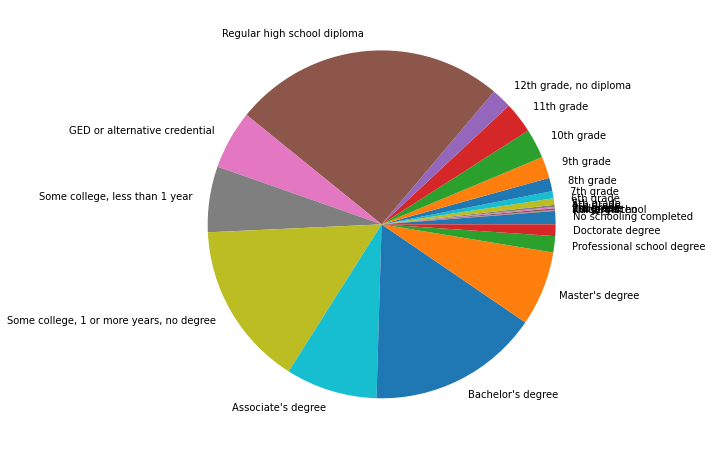

In [14]:
al_pct.plot.pie(figsize=(10,8));

In [15]:
pct_nohs = lambda row: (row.B15003_002E + row.B15003_003E + row.B15003_004E
                          + row.B15003_005E + row.B15003_006E + row.B15003_007E + row.B15003_008E
                          + row.B15003_009E + row.B15003_010E + row.B15003_011E + row.B15003_012E
                          + row.B15003_013E + row.B15003_014E +
                          row.B15003_015E + row.B15003_016E) / row.B15003_001E

In [16]:
# No High School

nohs = edu.apply(pct_nohs, axis=1)

In [17]:
nohs.sort_values()

Summary level: 040
Montana                 0.064497
Wyoming                 0.068340
Minnesota               0.068595
New Hampshire           0.068940
Alaska                  0.071529
Vermont                 0.073278
North Dakota            0.073513
Maine                   0.073898
Utah                    0.077191
Wisconsin               0.077917
Iowa                    0.079088
Hawaii                  0.080283
South Dakota            0.082532
Colorado                0.082537
Nebraska                0.085957
Washington              0.086727
Kansas                  0.090484
District of Columbia    0.090768
Michigan                0.091905
Idaho                   0.092267
Massachusetts           0.092424
Oregon                  0.092878
Connecticut             0.093699
Pennsylvania            0.094805
Ohio                    0.096214
Maryland                0.097961
Delaware                0.099827
Missouri                0.100786
New Jersey              0.101837
Virginia                

In [18]:
df = pd.DataFrame({"Unemployment Rate":unemployment, "Percent Without High School Education":nohs})

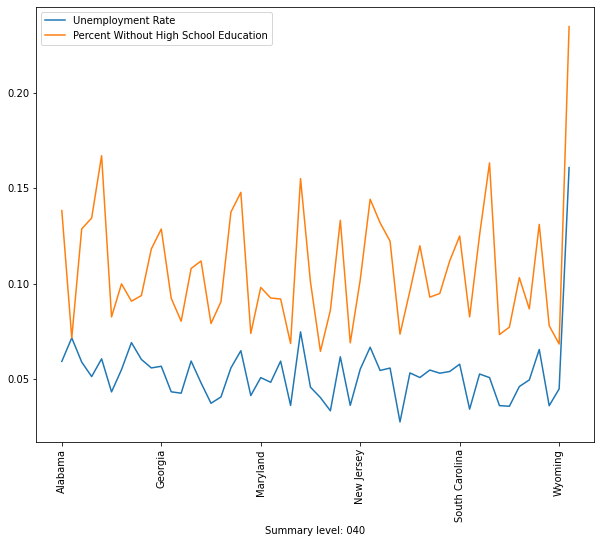

In [19]:
df.plot(rot='90', figsize=(10,8));

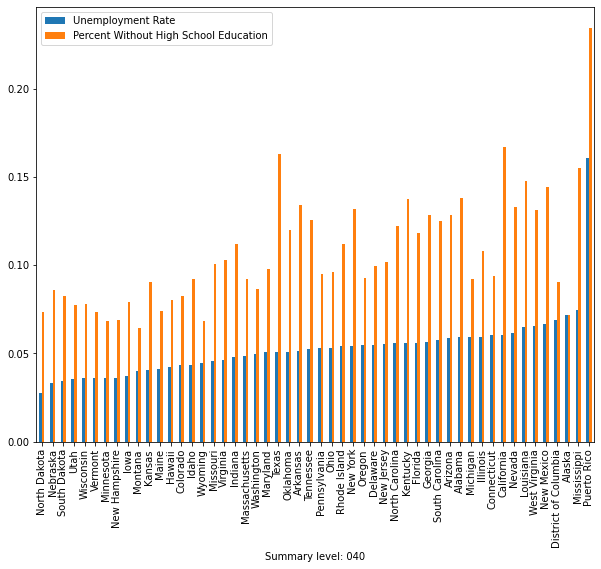

In [20]:
df.sort_values(by='Unemployment Rate').plot.bar(rot='90', figsize=(10,8));

## Correlation of Unemployment Rate to High School Education

In [21]:
df.corr()

,Unemployment Rate,Percent Without High School Education
Unemployment Rate,1.000000,0.764313
Percent Without High School Education,0.764313,1.000000


In [22]:
# Exclude Puerto Rico
df.iloc[:-1].corr()

,Unemployment Rate,Percent Without High School Education
Unemployment Rate,1.000000,0.645483
Percent Without High School Education,0.645483,1.000000


In [23]:
# Calculate Correlation Weighted by Total Employment
from statsmodels.stats.weightstats import DescrStatsW
dsw = DescrStatsW(df.values, weights=employ['B23025_001E'])

In [24]:
print(dsw.corrcoef)

[[1.         0.60696895]
 [0.60696895 1.        ]]


In [25]:
df.corr(method='spearman')

,Unemployment Rate,Percent Without High School Education
Unemployment Rate,1.000000,0.696235
Percent Without High School Education,0.696235,1.000000


## Are other factors at play as well?

In [26]:
var_dict = censusdata.censustable(SURVEY, YEAR, 'B16010')
var_dict['B16010_001E']['concept']

'EDUCATIONAL ATTAINMENT AND EMPLOYMENT STATUS BY LANGUAGE SPOKEN AT HOME FOR THE POPULATION 25 YEARS AND OVER'

In [27]:
col_names = [
    var_dict[code]['label'][len("Estimate!!"):].replace('!','').split(':')
    for code in var_dict
]
col_names = [(lst + ['', ''])[:4] for lst in col_names]

In [28]:
raw = censusdata.download(
    SURVEY, # Survey
    YEAR,   # Year
    censusdata.censusgeo([('state', '*')]), # Geography,
    list(var_dict.keys()) # Variables
)
raw.columns = pd.MultiIndex.from_tuples(col_names)
raw.index = [s.name for s in raw.index]

In [29]:
attainment = [
    'Less than high school graduate', 
    'High school graduate (includes equivalency)',
    "Some college or associate's degree",
    "Bachelor's degree or higher"
    ]

In [30]:
def pct_employed(df, type):
    out = df[type]['In labor force'] / (df[type]['In labor force'] + df[type]['Not in labor force'])
    return out

In [31]:
res = dict()
for ea in attainment:
    res[ea] = pct_employed(raw['Total'], ea)
edu1 = pd.concat([res[ea].iloc[:,0] for ea in attainment], keys=attainment, axis=1)

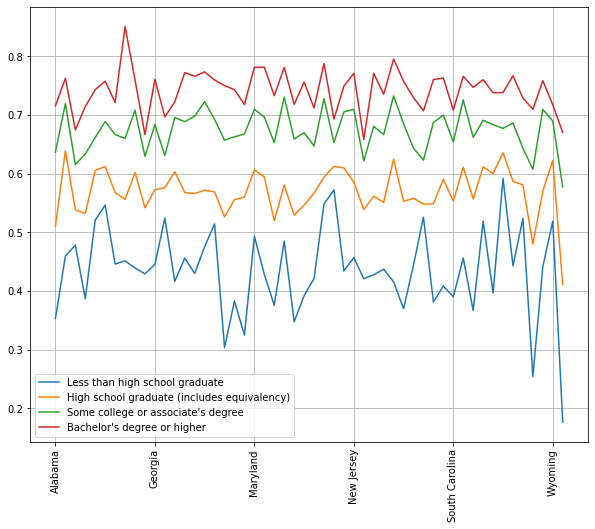

In [32]:
edu1.plot(rot=90, figsize=(10,8),grid=True);

In [33]:
language = [
    'Speak only English', 
    'Speak Spanish',
    'Speak other Indo-European languages',
    'Speak Asian and Pacific Island languages', 
    'Speak other languages'
]

In [34]:
def group_pct_employed(df, type, group):
    employed = df.loc[:, ('Total',type,'In labor force',group)]
    unemployed = df.loc[:, ('Total',type,'Not in labor force',group)]
    return employed / (employed + unemployed)

In [35]:
res = dict()
for ea in attainment:
    for lang in language:
        res[(ea,lang)] = group_pct_employed(raw, ea, lang)
edu2 = pd.concat(res, axis=1)

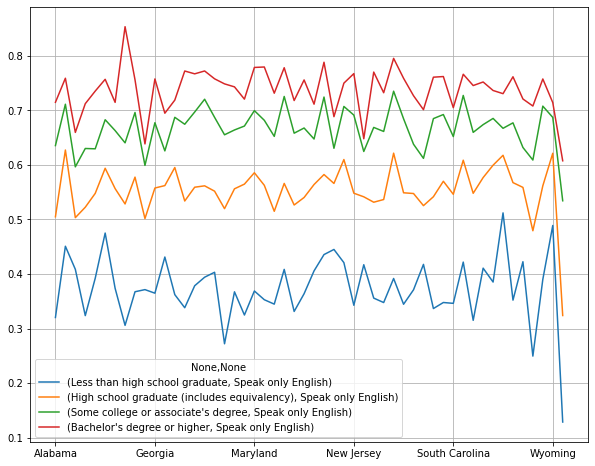

In [36]:
edu2.loc[:,(slice(None),'Speak only English')].plot(figsize=(10,8),grid=True);

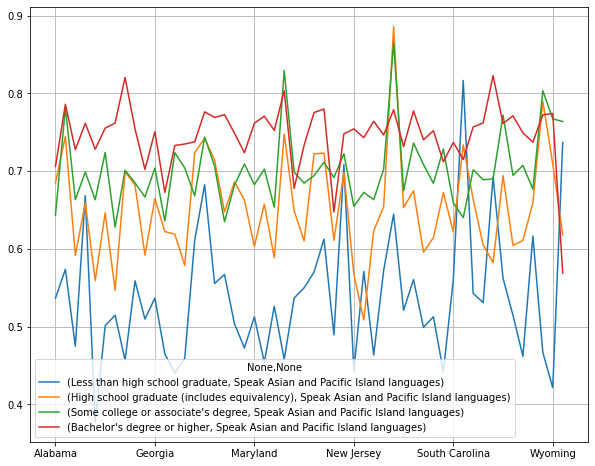

In [37]:
edu2.loc[:,(slice(None),'Speak Asian and Pacific Island languages')].plot(figsize=(10,8),grid=True);